# Aprendizaje de Máquina I - Trabajo Práctico Final

**Integrantes**:
- Federica Pavese (federica.pavese@gmail.com)
- Liliana Mariel Di Lanzo (lic.dilanzo@gmail.com)
- Pablo A. Salvagni (psalvagni@gmail.com )
- Pablo Maximiliano Lulic (maxisoad@gmail.com)
- Reinaldo Magallanes Saunders (rei.magallanes@gmail.com)


**Consigna**:
- El trabajo final de la cursada comprende de una investigación, desarrollo y resultados finales basados en un set de datos a elección por el grupo (máximo 6 personas).
- Los criterios de aprobación son los siguientes:
    - Obligación de trabajar en grupo mínimo de 2 y máximo de 6. Excepciones se pueden hacer mediante un correcto justificativo.
    - Cada TP debe citar la fuente de información de evaluación, es decir, citar de donde se obtuvieron los datos.
    - Puede ser entregado en cualquier formato, preferentemente en notebook de ipython (formato ipynb). También puede entregarse mediante un documento en Google Colab.
    - Contendrá la propuesta de investigación en los datos, citando el porqué de la evaluación y que se pretende encontrar o descubrir con dicha investigación
    - Deberá explicar el porqué de la elección del algoritmo empleado para la resolución del problema y cómo llegó a esa elección por sobre otras opciones
    - Deberá expresar de manera clara el resultado de la investigación aportando las métricas necesarias para comprender cómo se desempeña el algoritmo elegido.
    - El entregable debe venir con el código acompañado para su reproducibilidad.
    - En su cierre debe dar una reflexión de su investigación y proponer nuevos caminos de resolución en el caso de que sea necesario.
    - Como última fecha de entrega del trabajo, estará limitado a 7 días posteriores a la última clase.
    - La entrega es por el aula virtual, ya sea el envío del contenido o el link a repositorio (de GitHub o GitLab) con el trabajo.

--


## 1. Introducción y motivación

- **Fuente de información de evaluación**: Utilizaremos el dataset [Airline Passsenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction). Este dataset ya tiene el split hecho, en train y test, y comprende respuestas de la encuesta sobre la satisfaccion de pasajeros utilizando la aerolinea.

- **Objetivo**: Queremos predecir el nivel de satisfaccion de los pasajeros. Los targets son dos: "satisfecho" o "neutral o insatisfecho".

- **Problema de negocio**: Lorm p.

- **Enfoque**: Para abordar este problema utilizaremos técnicas de análisis de datos y machine learning para construir un modelo predictivo basado en el dataset disponible. Este modelo será validado y ajustado para asegurar su rendimiento y capacidad de generalización.

### Importación de librerías

In [3]:
import sys
print(sys.executable)


c:\Users\Lili\Desktop\UBA\03_Intro_IA\final\tp_final_ml_23co\.venv\Scripts\python.exe


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import optuna as optuna


c:\Users\Lili\Desktop\UBA\03_Intro_IA\final\tp_final_ml_23co\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Análisis expoloratorio inicial (EDA)

- Vista general de dataset

- Limpieza de columnas que no parecen servir.

- Separacion de numercias y categoricas

In [5]:
# importar datos
df = pd.read_csv('datasets/aerolineas/train.csv')

# visualizacion inicial
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
# Remover columna innecesaria
df = df.drop(columns=['Unnamed: 0'])

# obtener los tipos de cada columna
df.dtypes  


id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [7]:
# vista general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [8]:
# buscar faltantes, salvo Arrival Delay in Minutes que tiene muchos nulos, el resto no tienen.
df['Arrival Delay in Minutes'].isnull().sum()
# df.isna().mean ()*100 


np.int64(310)

In [9]:
#separo numericas y categoricas
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include="object").columns

print("Columnas numéricas:", num_cols)
print("Columnas categóricas:", cat_cols)

Columnas numéricas: Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')
Columnas categóricas: Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


In [10]:
#estadisticas base
# df.describe()

# balanceo entre clase
df['satisfaction'].value_counts()
df['satisfaction'].value_counts(normalize=True) * 100


satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: proportion, dtype: float64

In [11]:
df['satisfaction'].value_counts()
df['satisfaction'].value_counts(normalize=True) * 100

satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: proportion, dtype: float64

In [12]:
# Ver si hay Nulos en el dataset
df.isna().sum()

# Duplicados
df.duplicated().sum()

np.int64(0)

In [13]:
# Histogramas de Distribucion de variables numéricas

# for col in num_cols:
#     plt.figure()
#     df[col].hist(bins=20)
#     plt.title(f"Distribución de {col}")
#     plt.xlabel(col)
#     plt.ylabel("Frecuencia")
#     plt.show()

In [14]:
# Exploracion de variables categoricas
for col in cat_cols:
    print(f"\n=== {col} ===")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True) * 100)



=== Gender ===
Gender
Female    52727
Male      51177
Name: count, dtype: int64
Gender
Female    50.745881
Male      49.254119
Name: proportion, dtype: float64

=== Customer Type ===
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64
Customer Type
Loyal Customer       81.732176
disloyal Customer    18.267824
Name: proportion, dtype: float64

=== Type of Travel ===
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64
Type of Travel
Business travel    68.962696
Personal Travel    31.037304
Name: proportion, dtype: float64

=== Class ===
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64
Class
Business    47.798930
Eco         44.988643
Eco Plus     7.212427
Name: proportion, dtype: float64

=== satisfaction ===
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64
satisfaction
neutral or dissatisfied    56.666731
satisfied

#### Segun las variables categoricas, pareceria que quienes contestan la encuesta, son mayoritariamente quienes viajan en primera, que predominan en la mayoria de los casos: 
- Customer Type

- Type of Travel 

- Class

In [15]:
# analizar relacion de variables categoricas con la variable target
for col in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
    print(f"\n=== {col} vs satisfaction ===")
    print(pd.crosstab(df[col], df['satisfaction'], normalize='index') * 100)



=== Gender vs satisfaction ===
satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                      57.262882  42.737118
Male                        56.052524  43.947476

=== Customer Type vs satisfaction ===
satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                   52.270881  47.729119
disloyal Customer                76.334229  23.665771

=== Type of Travel vs satisfaction ===
satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                41.740283  58.259717
Personal Travel                89.832243  10.167757

=== Class vs satisfaction ===
satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                    30.574852  69.425148
Eco                         81.386245  18.613755
Eco Plus                    75.393648  24.

In [16]:

# exploracion de variables numericas
df[num_cols].describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


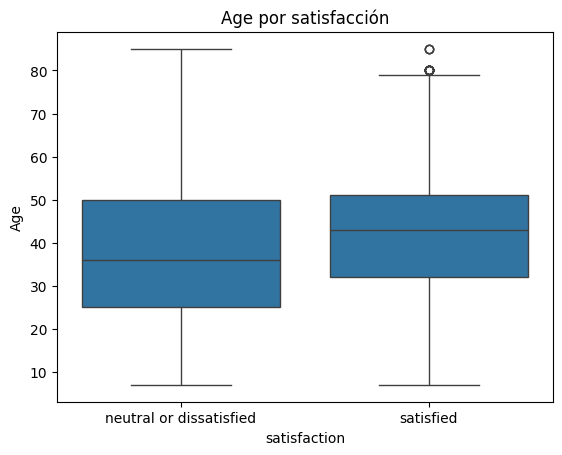

In [17]:
# comprarar numercias segun satisfaccion 
# buscar overlaps, diferencias, dispersion.

# for col in ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']:
for col in ['Age']:
    plt.figure()
    sns.boxplot(data=df, x='satisfaction', y=col)
    plt.title(f"{col} por satisfacción")
    plt.show()

## 3. Selección del feature para el modelo baseline
- Con el EDA realizado, buscamos ahora identificar qué variable individual está más fuertemente asociada con la variable objetivo satisfaction.
- El objetivo es construir un modelo baseline utilizando solo un feature, que nos sirva como referencia mínima para evaluar si modelos más complejos realmente agregan valor.

In [18]:
# 3.1 - Crear variable objetivo binaria

# En el dataset la variable 'satisfaction' es categórica con valores como:
# 'satisfied' y 'neutral or dissatisfied'.
# Para poder calcular correlaciones numéricas y entrenar modelos,
# la convertimos a 0 y 1:
#   1 = satisfied
#   0 = neutral or dissatisfied

df["satisfaction_bin"] = (df["satisfaction"] == "satisfied").astype(int)

# 3.2 - Identificar columnas numéricas
# Seleccionamos únicamente las columnas de tipo numérico
# (int64 y float64) y excluimos la variable objetivo binaria,
# ya que la usaremos solo como referencia de correlación.

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

if "satisfaction_bin" in num_cols:
    num_cols.remove("satisfaction_bin")

print("Columnas numéricas consideradas para la correlación:")
print(num_cols)


Columnas numéricas consideradas para la correlación:
['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [19]:
# 3.3 - Calcular la correlación de cada variable numérica
#       con la variable objetivo binaria 'satisfaction_bin'


# corrwith calcula la correlación de cada columna numérica con la serie indicada.
corrs = df[num_cols].corrwith(df["satisfaction_bin"])

# Ordenamos las correlaciones según el valor absoluto (|corr|),
# de mayor a menor, para identificar las variables más relacionadas
# con la satisfacción.
corrs_sorted = corrs.sort_values(key=lambda s: s.abs(), ascending=False)

print("Correlación de cada variable numérica con la satisfacción (binaria):")
print(corrs_sorted)

# Mostramos solo las 10 variables más correlacionadas para tener
# una visión rápida y poder elegir el feature del baseline.
print("\nTop 10 variables más correlacionadas (en valor absoluto):")
print(corrs_sorted.head(10))


Correlación de cada variable numérica con la satisfacción (binaria):
Online boarding                      0.503557
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Ease of Online booking               0.171705
Age                                  0.137167
Arrival Delay in Minutes            -0.057582
Departure/Arrival time convenient   -0.051601
Departure Delay in Minutes          -0.050494
id                                   0.013734
Gate location                        0.000682
dtype: float64

Top 10 variables más correlacionadas (en 

In [20]:
# 3.4 - Elegir el feature para el modelo baseline

# A partir del análisis de correlación, 'Online boarding' resultó ser
# la variable numérica más fuertemente asociada con la satisfacción
# (correlación ≈ 0.50). Por eso la usamos como único predictor
# en el modelo baseline.

feature_baseline = "Online boarding"

print("Feature elegido para el baseline:", feature_baseline)
print("Correlación con la variable objetivo:",
      corrs[feature_baseline])


Feature elegido para el baseline: Online boarding
Correlación con la variable objetivo: 0.50355732164701


In [21]:
# 3.5 - Definir X (predictor) e y (variable objetivo)

# Usamos únicamente la columna 'Online boarding' como X.
# La variable objetivo es la versión binaria de satisfacción:
#   1 = satisfied
#   0 = neutral or dissatisfied

X = df[[feature_baseline]]    # DataFrame con una sola columna
y = df["satisfaction_bin"]    # target binaria


# 3.6 - Separar en entrenamiento y prueba

# Hacemos un split 80/20 y estratificamos por y para mantener
# la proporción de clases en ambos conjuntos.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# 3.7 - Definir y entrenar el modelo baseline

# Elegimos un Árbol de Decisión poco profundo como modelo sencillo.
# La idea del baseline no es tener el mejor modelo posible,
# sino un punto de referencia mínimo.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

baseline_clf = DecisionTreeClassifier(
    max_depth=3,      # árbol chico para evitar sobreajuste
    random_state=42
)

# Entrenamiento del modelo con el conjunto de entrenamiento
baseline_clf.fit(X_train, y_train)


# 3.8 - Evaluar el modelo baseline

# Predicciones sobre el conjunto de test
y_pred = baseline_clf.predict(X_test)

# Accuracy: porcentaje de aciertos sobre el total
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy baseline (solo '{feature_baseline}'): {acc:.4f}\n")

# Matriz de confusión: distribución de aciertos/errores por clase
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación: precision, recall y F1 por clase
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy baseline (solo 'Online boarding'): 0.7908

Matriz de confusión:
[[8698 3078]
 [1270 7735]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80     11776
           1       0.72      0.86      0.78      9005

    accuracy                           0.79     20781
   macro avg       0.79      0.80      0.79     20781
weighted avg       0.80      0.79      0.79     20781



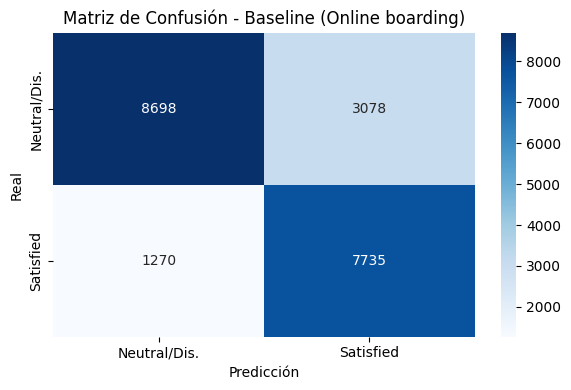

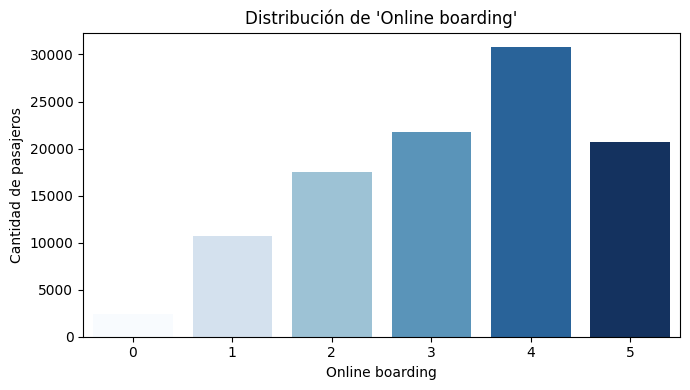

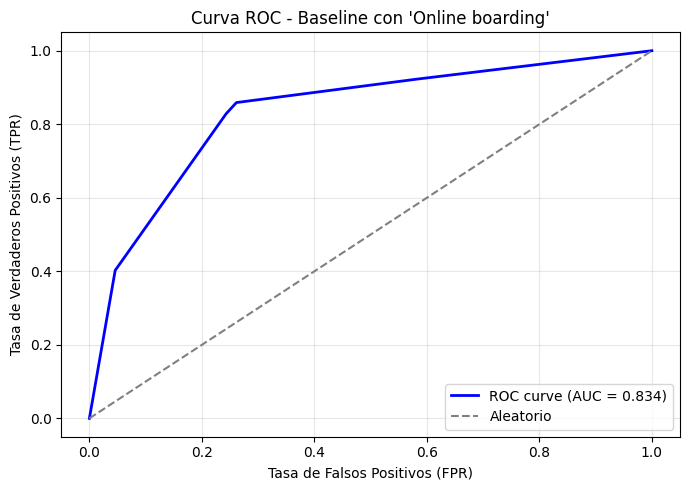

In [24]:
# 3.9 - Gráficos 

# Matriz de confusión (heatmap):
# Hacemos un gráfico tipo heatmap para visualizar mejor
# los aciertos y errores del modelo baseline.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

sns.heatmap(
    cm,                                  # matriz calculada antes
    annot=True,                          # muestra los números dentro del cuadro
    fmt="d",                             # formato entero
    cmap="Blues",                        # paleta de colores
    xticklabels=["Neutral/Dis.", "Satisfied"],   # etiquetas para la clase predicha
    yticklabels=["Neutral/Dis.", "Satisfied"]    # etiquetas para la clase real
)

plt.title(f"Matriz de Confusión - Baseline ({feature_baseline})")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

#Distribución del feature Online boarding

# Este gráfico ayuda a visualizar cómo se distribuyen los valores
# del feature elegido para el baseline.
# Si la variable está fuertemente segmentada, puede explicar
# por qué funciona bien como predictor simple.

plt.figure(figsize=(7,4))
sns.countplot(data=df, x=feature_baseline, hue=feature_baseline, palette="Blues", legend=False)

plt.title(f"Distribución de '{feature_baseline}'")
plt.xlabel(feature_baseline)
plt.ylabel("Cantidad de pasajeros")
plt.tight_layout()
plt.show()


# Curva ROC y AUC del modelo baseline

# La curva ROC muestra la relación entre el TPR (recall positivo)
# y el FPR (falsos positivos) para diferentes umbrales.
# El AUC mide el área bajo esa curva:
#   - 0.5 ~ aleatorio
#   - 1.0 ~ perfecto
# Este valor nos sirve como referencia mínima para comparar modelos posteriores.

from sklearn.metrics import roc_curve, auc

# Para generar la curva ROC necesitamos probabilidades, no clases.
y_proba = baseline_clf.predict_proba(X_test)[:, 1]

# FPR = False Positive Rate
# TPR = True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = auc(fpr, tpr)

# Gráfico
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color="blue", lw=2,
         label=f"ROC curve (AUC = {roc_auc:.3f})")

# Línea diagonal (modelo aleatorio)
plt.plot([0,1], [0,1], color="gray", ls="--", label="Aleatorio")

plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title(f"Curva ROC - Baseline con '{feature_baseline}'")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
